In [35]:
import numpy as np
import matplotlib.pyplot as plt
import os
### get main path, loop over main parameters, read the files, save the mean and std 
# lmnlist = [3.2,4.0,4.8,6.0]
# # aslist = [20000,50000,100000]
# # stlist = [400000,1000000,5000000]
# valist = [0.0, 0.04, 0.08, 0.12,0.16,0.2,0.25,0.3,0.4,0.7,1.0]
# dsalist=[0.001,0.005,0.01,0.02]

## aug set

lmnlist = [3.2,4.0,4.8,6.0]
# valist = [0.0, 0.04, 0.08, 0.12,0.14, 0.16,0.18, 0.2,0.22,0.25,0.3,0.35,\
#           0.4,0.45,0.5,0.55,0.6,0.7,0.75,0.8,0.9,1.0] 
# valist = [0.0, 0.04, 0.08, 0.12,0.14, 0.16,0.2,0.22,0.25,0.3,0.35,\
#           0.4,0.45,0.5,0.55,0.6,0.7,0.75,0.8,0.9,1.0] 
valist = [0.0, 0.04, 0.08, 0.12,0.16,0.2,0.25,0.3,0.4,0.7,1.0]
dsalist=[0.001,0.005,0.01,0.02]
# dsalist = [0.001,0.02]
lmnlist = [0.00001,0.01,0.1,0.2]
setlist = [1,2,3,4] #,5,6,7,8]

mainpath = '/Data1/chromosome_modelling/prepSurf_perturb_merlin/'
outdir = 'phaseIM_heatmaps_lmn/'
pref='ell' #sph
inprefix='3' #sph3
Tp=0.0001 #0.2
# pref='sph'
# inprefix='sph3'
# Tp=0.2

In [36]:
def genmat(lmnlist, valist, dsa, setlist, mainpath, inprefix, pref, Tp):


    mat = np.zeros([len(lmnlist),len(valist),2],np.float64)
    for i in range(len(lmnlist)):
        lmn = lmnlist[i]
        if lmn == 0.00001:
            lmnstr = "0.00001"
        elif lmn == 0.01:
            lmnstr = "0.01"
        elif lmn == 0.1:
            lmnstr = "0.1"
        elif lmn == 0.2:
            lmnstr = "0.2"
        else:
            lmnstr = str(lmn)
        # lmnstr = f'{lmn:.1f}'
        # if lmn == 6.0:
        #     lmnstr = f'{lmn:.2f}'
        for j in range(len(valist)):
            va = valist[j]
            data = []
            for set in setlist:
                dirpath = mainpath + 'Set_'+str(set)+'_in'+inprefix+'_'+pref+'_Tp'+str(Tp)+'/'
                dirpath = dirpath + '46ch_T0.0001_sga'+str(dsa)+'_sgd0.001_epb8_epa4.0' + \
                '_epm4.0_lmn'+lmnstr+'_sfdf0.001_sgat2_as'+str(va)+'/'

                filename = dirpath + "Conf-thermo.dat"
#                 print(filename)
        
        
                try:
                    with open(filename, "r") as infile:
                        lines = infile.readlines()
                        for line in lines[-20000:]:  # last 20000 lines
                            tokens = line.split()
                            data.append(float(tokens[1]))  # IM En
                except FileNotFoundError:
                    print(f"File not found: {filename}, skipping.")
                    continue

            ## get mean and std from all sets
            meandata = np.mean(np.array(data))
            stddata = np.std(np.array(data))
            mat[i,j,0] = meandata
            mat[i,j,1] = stddata
    return mat


    

In [37]:
matlist = []
for dsa in dsalist:
    mat = genmat(lmnlist, valist, dsa, setlist, mainpath, inprefix, pref, Tp)
    matlist.append(mat)



Processing dsa = 0.001
[0 1 2 3 4]
Processing dsa = 0.005
[0 1 2 3 4]
Processing dsa = 0.01
[0 1 2 3 4]
Processing dsa = 0.02
[0 1 2 3 4]


<Figure size 640x480 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

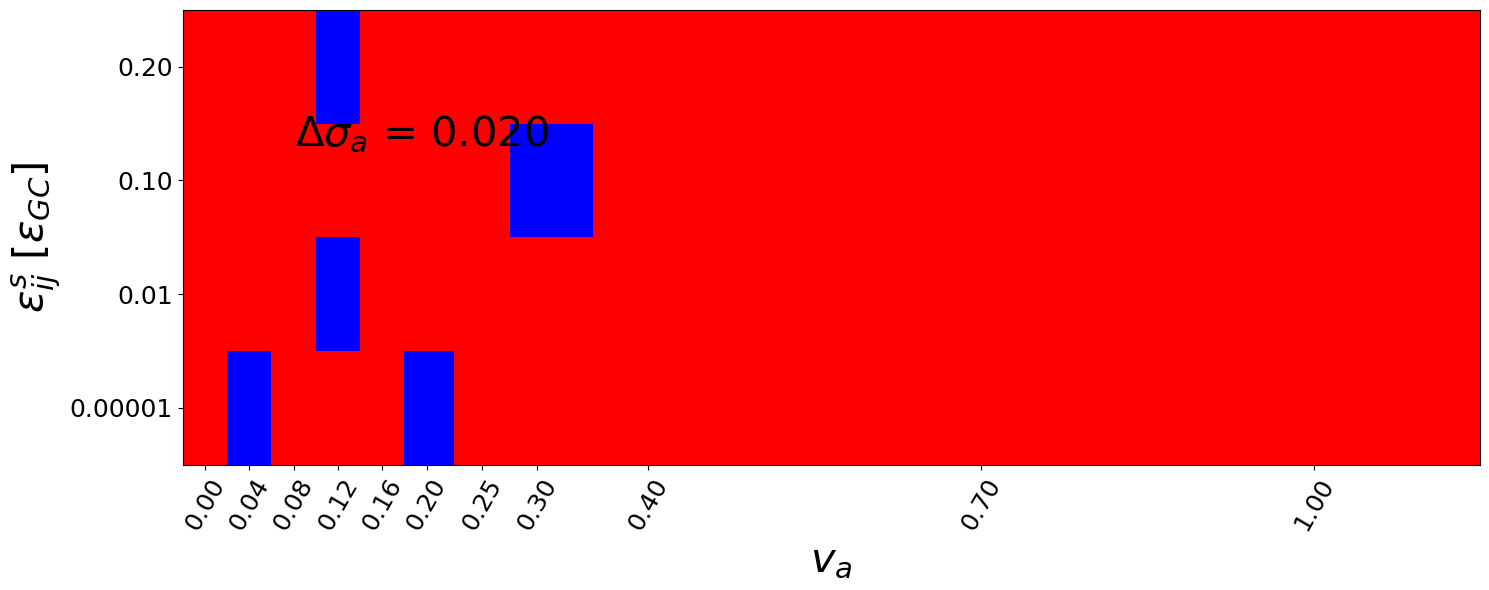

In [45]:
### having completed filling up mat, plot the two things
os.makedirs(outdir, exist_ok=True)

for i,dsa in enumerate(dsalist):
    mat = matlist[i]
    print(f"Processing dsa = {dsa}")

    # Compute the widths for each block based on the difference between consecutive valist values
    x_edges = np.concatenate(([valist[0] - (valist[1] - valist[0]) / 2], 
                            (np.array(valist[:-1]) + np.array(valist[1:])) / 2, 
                            [valist[-1] + (valist[-1] - valist[-2]) / 2]))
    # Make y_edges with constant box size
    y_step = 1
    y_edges = np.arange(0, len(lmnlist) + 1, y_step)
    print(y_edges)
    plt.clf()
    fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(15, 6), gridspec_kw={'width_ratios': [0.8]})
    im1 = axs.pcolormesh(x_edges, y_edges, mat[:, :, 0], vmin=-14, vmax=-2, cmap='coolwarm', shading='auto')
    cb = fig.colorbar(im1)
    cb.set_ticks(np.linspace(-14, -2, 10))
    cb.ax.set_yticklabels([f'{x:.2f}' for x in np.linspace(-14, -2, 10)], size=18)
    cb.set_label("$E_{IM}$", labelpad=-1, size=25)
    axs.set_xticks(valist)
    axs.set_yticks(np.arange(len(lmnlist)) + 0.5)
    axs.set_xticklabels([f"{x:.2f}" for x in valist], fontsize=18, rotation=60)
    axs.set_yticklabels([f"{y:.5f}" if y < 0.01 else f"{y:.2f}" for y in lmnlist], fontsize=18)
    axs.set_xlabel("$v_a$", fontsize=30)
    axs.set_ylabel("$\epsilon_{ij}^s$ [$\epsilon_{GC}$]", fontsize=30)
    plt.figtext(0.2, 0.75, f'$\Delta\sigma_a$ = {dsa:.3f}', size=30)
    plotfile = outdir + "phaseIM_heatmap_aug_in" + inprefix + "_pref_" + pref + "_Tp" + str(Tp) + "_dsa" + str(dsa) + ".png"
    plt.tight_layout()
    plt.savefig(plotfile)

    # Generate a second plot with thresholding
    threshold = -11.8
    binary_mat = np.where(mat[:, :, 0] < threshold, 0, 1)  # 0 for values below threshold, 1 for above

    plt.clf()
    fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(15, 6), gridspec_kw={'width_ratios': [0.8]})
    im2 = axs.pcolormesh(x_edges, y_edges, binary_mat, cmap='bwr', shading='auto')
    axs.set_xticks(valist)
    axs.set_yticks(np.arange(len(lmnlist)) + 0.5)
    axs.set_xticklabels([f"{x:.2f}" for x in valist], fontsize=18, rotation=60)
    axs.set_yticklabels([f"{y:.5f}" if y < 0.01 else f"{y:.2f}" for y in lmnlist], fontsize=18)
    axs.set_xlabel("$v_a$", fontsize=30)
    axs.set_ylabel("$\epsilon_{ij}^s$ [$\epsilon_{GC}$]", fontsize=30)
    plt.figtext(0.2, 0.75, f'$\Delta\sigma_a$ = {dsa:.3f}', size=30)
    plotfile_binarised = outdir + "phaseIM_heatmap_aug_in" + inprefix + "_pref_" + pref + "_Tp" + str(Tp) + "_dsa" + str(dsa) + "_binarised.png"
    plt.tight_layout()
    plt.savefig(plotfile_binarised)
